In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5174
Yes    1869
Name: Churn, dtype: int64


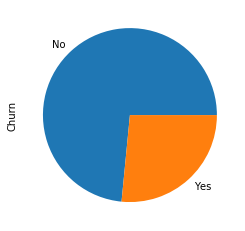

In [3]:
#target variable visualizing
df["Churn"].value_counts().plot(kind = "pie")
print(df["Churn"].value_counts())

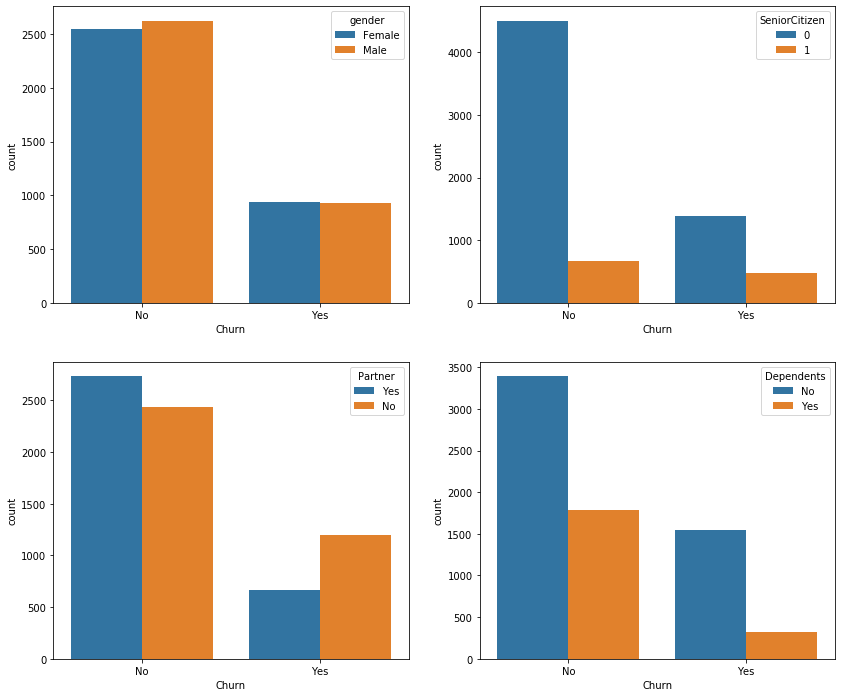

In [4]:
plt.figure(figsize=(14,12))

#gender influence
plt.subplot(2,2,1)
sns.countplot(df["Churn"],hue = df["gender"])


#Senior citizen influence on target variable
plt.subplot(2,2,2)
sns.countplot(df["Churn"],hue = df["SeniorCitizen"])



#Partner influence on target variable
plt.subplot(2,2,3)
sns.countplot(df["Churn"],hue = df["Partner"])


#dependents influence on target value
plt.subplot(2,2,4)
sns.countplot(df["Churn"],hue = df["Dependents"])

In [10]:
# GENDER
# 1 - male
# 0 - female


data["gender"].replace(["Male","Female"],[1,0],inplace =True)


#PARTNER
data["Partner"].replace(["Yes","No"],[1,0],inplace =True)


#DEPENDENTS
data["Dependents"].replace(["Yes","No"],[1,0],inplace =True)


#MULTIPLELINES
data["MultipleLines"].replace(["Yes","No","No phone service"],[1,0,2],inplace = True)


#PHONESERVICE
data["PhoneService"].replace(["Yes","No"],[1,0],inplace =True)


#INTERNET SERVICES
data["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)


#CONTARCT
data["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)


#TECH SUPPORT
data["TechSupport"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)


#ONLINE SECURITY
data["OnlineSecurity"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)


#DEVICE PROTECTION
data["DeviceProtection"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#STREAMING MOVIES
data["StreamingMovies"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#STREAMING TV
data["StreamingTV"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#ONLINEBACKUP
data["OnlineBackup"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#PAPERLESS BILLING
data["PaperlessBilling"].replace(["No","Yes"],[0,1],inplace =True)


#PAYMENT METHOD
data["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)


#total Payment
data["TotalCharges"].replace([" "],[0],inplace = True)
data["TotalCharges"] = data["TotalCharges"].astype('float')



#churn
data["Churn"].replace(["No","Yes"],[0,1],inplace =True)

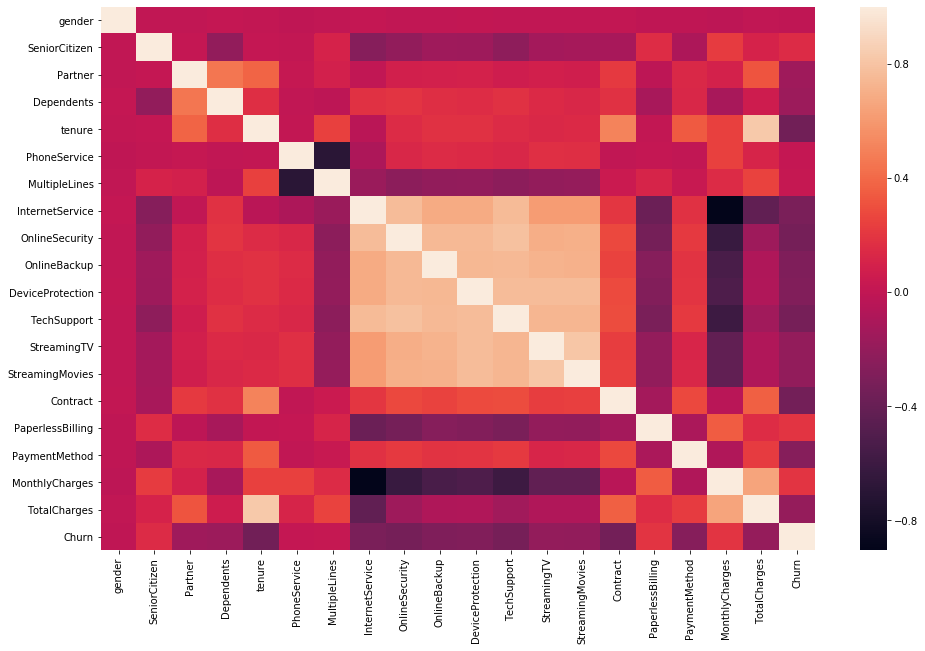

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr())

In [12]:
#dropping customer id columns Since that don't have any influence on target variable
data.drop("customerID",axis = 1,inplace = True)

In [13]:
#splitting of dataset
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2)

In [14]:
#cross validation
def val(a,b,classifier):
    val = cross_val_score(classifier,a,b,scoring = "accuracy",cv = 10)
    return val

In [15]:
#accuarcy
def accuracy(a,b):
    ac = accuracy_score(a,b)
    cr = classification_report(a,b)
    print("accuracy score : ",ac)
    print("--"*15)
    print("Classification report :",cr)
    return ac


In [16]:
#KNN algorithm
knc = KNeighborsClassifier(n_neighbors=23)
knc.fit(x_train,y_train)
knc_pred = knc.predict(x_test)

In [17]:
acc_knn = accuracy(y_test,knc_pred)

accuracy score :  0.8019872249822569
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1061
           1       0.66      0.41      0.51       348

    accuracy                           0.80      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409



In [18]:
#Decision Tree
dtc = DecisionTreeClassifier(random_state=2)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

In [19]:
acc_dtc = accuracy(y_test,dtc_pred)

accuracy score :  0.730305180979418
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1061
           1       0.46      0.48      0.47       348

    accuracy                           0.73      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.73      0.73      0.73      1409



In [20]:
#svc
svc = SVC(random_state = 2) 
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

/home/mk/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
acc_svc = accuracy(y_test,svc_pred)

accuracy score :  0.78708303761533
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1061
           1       0.72      0.22      0.34       348

    accuracy                           0.79      1409
   macro avg       0.76      0.60      0.61      1409
weighted avg       0.78      0.79      0.74      1409



,accuracy
Decision Tree,0.730305
KNN,0.801987
SVC,0.787083


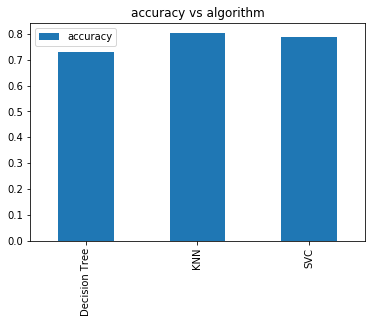

In [22]:
z = pd.DataFrame(data = [acc_dtc,acc_knn,acc_svc],index = ['Decision Tree','KNN','SVC'],columns=[ "accuracy"])
#comparing results
z.plot(kind = 'bar',title="accuracy vs algorithm")
z